# Semana 2 - Challenge Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = '/content/dados.csv'
base_alura_cash = pd.read_csv(dados)
base_alura_cash.head()

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
0,27.0,68000.0,Alugada,4.0,Reforma,A,8700.0,7.88,0.0,0.13,N,5.0
1,24.0,12600.0,Alugada,2.0,Empreender,C,2500.0,13.11,1.0,0.20,S,2.0
2,30.0,100000.0,Alugada,13.0,Pagar dívidas,A,12000.0,7.88,0.0,0.12,N,9.0
3,28.0,83000.0,Hipoteca,6.0,Pagar dívidas,B,5000.0,NaN,0.0,0.06,N,9.0
4,30.0,110400.0,Alugada,1.0,Empreender,D,14000.0,16.89,1.0,0.13,N,6.0


In [3]:
base_alura_cash.shape

(34501, 12)

In [4]:
base_alura_cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34501 entries, 0 to 34500
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   idade_cliente                      34177 non-null  float64
 1   salario_cliente                    34162 non-null  float64
 2   tipo_casa_cliente                  34170 non-null  object 
 3   anos_trabalhados_cliente           33247 non-null  float64
 4   motivo_emprestimo                  34186 non-null  object 
 5   pontuacao_emprestimo               34188 non-null  object 
 6   valor_do_emprestimo                34170 non-null  float64
 7   juros_emprestimo                   30871 non-null  float64
 8   inadimplencia_emprestimo           34158 non-null  float64
 9   percentual_emprestimo_salario      34182 non-null  float64
 10  historico_inadimplencia            34131 non-null  object 
 11  a_quanto_tempo_tem_cartao_credito  34497 non-null  flo

In [5]:
base_alura_cash.describe()

,idade_cliente,salario_cliente,anos_trabalhados_cliente,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,a_quanto_tempo_tem_cartao_credito
count,34177.000000,3.416200e+04,33247.000000,34170.000000,30871.00000,34158.000000,34182.000000,34497.000000
mean,27.731018,6.602869e+04,4.787229,9590.576529,11.01363,0.218192,0.170227,5.808186
std,6.345281,6.140506e+04,4.137463,6320.429041,3.24124,0.413024,0.106783,4.063231
min,20.000000,4.000000e+03,0.000000,500.000000,5.42000,0.000000,0.000000,2.000000
25%,23.000000,3.849300e+04,2.000000,5000.000000,7.90000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.99000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.47000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.22000,1.000000,0.830000,30.000000


## Remover nulos

Eu decidi começar a remoção de dados nulos pela coluna "inadimplencia_emprestimo", porque entendi que ela seria a coluna que classifica o modelo de Machine Learning, ou seja, o *y*. 

In [6]:
inadimplencia_nulo = base_alura_cash[base_alura_cash['inadimplencia_emprestimo'].isnull()]
inadimplencia_nulo

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
96,26.0,110000.0,Alugada,10.0,Educação,A,NaN,NaN,NaN,0.30,N,2.0
206,25.0,74800.0,Alugada,2.0,Médico,B,5000.0,12.69,NaN,NaN,N,3.0
229,24.0,48000.0,Alugada,8.0,Médico,C,4000.0,5.99,NaN,0.07,N,6.0
500,22.0,28000.0,Hipoteca,NaN,Pagar dívidas,B,7000.0,11.49,NaN,0.11,N,15.0
552,24.0,68000.0,Hipoteca,7.0,Educação,A,5000.0,11.86,NaN,NaN,N,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34016,NaN,21600.0,Alugada,NaN,Empreender,C,3500.0,15.58,NaN,0.10,N,6.0
34115,29.0,61000.0,Hipoteca,9.0,Reforma,B,6000.0,7.49,NaN,0.20,NaN,3.0
34208,NaN,70000.0,Alugada,3.0,Pessoal,B,6000.0,7.68,NaN,0.08,N,10.0
34294,NaN,53000.0,Alugada,13.0,Educação,C,10000.0,11.66,NaN,0.16,S,8.0


In [7]:
inadimplencia_nulo.index

Int64Index([   96,   206,   229,   500,   552,   624,   669,   673,   770,
              881,
            ...
            33525, 33858, 33919, 33937, 33995, 34016, 34115, 34208, 34294,
            34395],
           dtype='int64', length=343)

In [8]:
base_alura_cash = base_alura_cash.drop(labels = inadimplencia_nulo.index)
base_alura_cash

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
0,27.0,68000.0,Alugada,4.0,Reforma,A,8700.0,7.88,0.0,0.13,N,5.0
1,24.0,12600.0,Alugada,2.0,Empreender,C,2500.0,13.11,1.0,0.20,S,2.0
2,30.0,100000.0,Alugada,13.0,Pagar dívidas,A,12000.0,7.88,0.0,0.12,N,9.0
3,28.0,83000.0,Hipoteca,6.0,Pagar dívidas,B,5000.0,NaN,0.0,0.06,N,9.0
4,30.0,110400.0,Alugada,1.0,Empreender,D,14000.0,16.89,1.0,0.13,N,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34496,23.0,80500.0,Alugada,5.0,Empreender,B,7200.0,9.25,0.0,0.09,N,3.0
34497,39.0,56000.0,Hipoteca,14.0,Pessoal,C,10000.0,12.73,0.0,0.18,S,12.0
34498,28.0,29000.0,Alugada,1.0,Médico,C,8000.0,13.11,1.0,0.28,S,9.0
34499,27.0,44000.0,Hipoteca,2.0,Médico,NaN,7500.0,10.59,0.0,0.14,N,3.0


E depois, eliminar os dados inconsistentes que identifiquei na semana anterior: os 5 clientes com mais de 100 anos de idade e os clientes que trabalharam por mais de 120 anos.

In [9]:
base_alura_cash.describe()

,idade_cliente,salario_cliente,anos_trabalhados_cliente,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,a_quanto_tempo_tem_cartao_credito
count,33865.000000,3.385700e+04,32951.000000,33863.000000,30598.000000,34158.000000,33876.000000,34154.000000
mean,27.726591,6.603013e+04,4.787806,9596.386912,11.015236,0.218192,0.170254,5.805704
std,6.333610,6.142647e+04,4.136504,6319.601416,3.241917,0.413024,0.106796,4.059222
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.849200e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [10]:
idade_maior_que_100 = base_alura_cash[base_alura_cash['idade_cliente'] > 100]
idade_maior_que_100

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
8595,144.0,200000.0,Hipoteca,4.0,Educação,B,6000.0,11.86,0.0,0.03,N,2.0
16447,144.0,250000.0,Alugada,4.0,Empreender,C,4800.0,13.57,0.0,0.02,N,3.0
21555,144.0,6000000.0,Hipoteca,12.0,Pessoal,C,5000.0,12.73,0.0,0.00,N,25.0
22716,123.0,78000.0,Alugada,7.0,Empreender,B,20000.0,NaN,0.0,0.26,N,4.0
27207,123.0,80004.0,Alugada,2.0,Educação,B,20400.0,10.25,0.0,0.25,N,3.0


In [11]:
base_alura_cash = base_alura_cash.drop(labels = idade_maior_que_100.index)
base_alura_cash

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
0,27.0,68000.0,Alugada,4.0,Reforma,A,8700.0,7.88,0.0,0.13,N,5.0
1,24.0,12600.0,Alugada,2.0,Empreender,C,2500.0,13.11,1.0,0.20,S,2.0
2,30.0,100000.0,Alugada,13.0,Pagar dívidas,A,12000.0,7.88,0.0,0.12,N,9.0
3,28.0,83000.0,Hipoteca,6.0,Pagar dívidas,B,5000.0,NaN,0.0,0.06,N,9.0
4,30.0,110400.0,Alugada,1.0,Empreender,D,14000.0,16.89,1.0,0.13,N,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34496,23.0,80500.0,Alugada,5.0,Empreender,B,7200.0,9.25,0.0,0.09,N,3.0
34497,39.0,56000.0,Hipoteca,14.0,Pessoal,C,10000.0,12.73,0.0,0.18,S,12.0
34498,28.0,29000.0,Alugada,1.0,Médico,C,8000.0,13.11,1.0,0.28,S,9.0
34499,27.0,44000.0,Hipoteca,2.0,Médico,NaN,7500.0,10.59,0.0,0.14,N,3.0


In [12]:
trabalho_maior_que_100 = base_alura_cash[base_alura_cash['anos_trabalhados_cliente'] > 100]
trabalho_maior_que_100

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
12410,21.0,192000.0,Hipoteca,123.0,Empreender,A,20000.0,6.54,0.0,0.10,N,4.0
29928,22.0,59000.0,Alugada,123.0,Pessoal,D,35000.0,16.02,1.0,0.59,S,3.0


In [13]:
base_alura_cash = base_alura_cash.drop(labels = trabalho_maior_que_100.index)
base_alura_cash

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
0,27.0,68000.0,Alugada,4.0,Reforma,A,8700.0,7.88,0.0,0.13,N,5.0
1,24.0,12600.0,Alugada,2.0,Empreender,C,2500.0,13.11,1.0,0.20,S,2.0
2,30.0,100000.0,Alugada,13.0,Pagar dívidas,A,12000.0,7.88,0.0,0.12,N,9.0
3,28.0,83000.0,Hipoteca,6.0,Pagar dívidas,B,5000.0,NaN,0.0,0.06,N,9.0
4,30.0,110400.0,Alugada,1.0,Empreender,D,14000.0,16.89,1.0,0.13,N,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34496,23.0,80500.0,Alugada,5.0,Empreender,B,7200.0,9.25,0.0,0.09,N,3.0
34497,39.0,56000.0,Hipoteca,14.0,Pessoal,C,10000.0,12.73,0.0,0.18,S,12.0
34498,28.0,29000.0,Alugada,1.0,Médico,C,8000.0,13.11,1.0,0.28,S,9.0
34499,27.0,44000.0,Hipoteca,2.0,Médico,NaN,7500.0,10.59,0.0,0.14,N,3.0




---
No Discord, houve um debate sobre deletar, ou não, todos os dados nulos do Dataframe. 

Inicialmente, eu havia planejado deletar apenas os nulos da coluna 'inadimplencia_emprestimo'. Mas conforme o debate foi avançando, vi possibilidades de desenvolvimento, como:

- Criar dois Dataframes, em que se apagaria todos os nulos em um, enquanto haveria os nulos no outro, e ao final de todas as análises comparar os resultados obtidos nos dois;
- Substituir os nulos pelas médias, no caso das variáveis quantitativas, e atribuir o valor que mais aparecer nas variáveis categóricas;
- Ou atribuir um novo termo para as variáveis categóricas, como ‘Outro’ para o ‘Tipo de casa’, ‘Motivo do empréstimo’, ‘Pontuação do empréstimo’ e ‘Histórico de inadimplência’.

Achei que todas foram soluções válidas, porém se este fosse um trabalho real, é provável que eu não tivesse tempo suficiente para executar todas as possibilidades e considerando que a base de dados original contém mais de 34 mil registros, mesmo com a retirada dos nulos, ela ainda seria um Dataframe robusto. Por isso, decidi apagar todos os nulos e caso sobrasse tempo, testar com os dados que tratei até aqui.

---



In [14]:
base_alura_cash.isna().sum()

idade_cliente                         293
salario_cliente                       301
tipo_casa_cliente                     297
anos_trabalhados_cliente             1207
motivo_emprestimo                     297
pontuacao_emprestimo                  291
valor_do_emprestimo                   295
juros_emprestimo                     3559
inadimplencia_emprestimo                0
percentual_emprestimo_salario         282
historico_inadimplencia               332
a_quanto_tempo_tem_cartao_credito       4
dtype: int64

In [15]:
# Dataframe sem dados nulos

alura_cash_completa = base_alura_cash.dropna()
alura_cash_completa

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
0,27.0,68000.0,Alugada,4.0,Reforma,A,8700.0,7.88,0.0,0.13,N,5.0
1,24.0,12600.0,Alugada,2.0,Empreender,C,2500.0,13.11,1.0,0.20,S,2.0
2,30.0,100000.0,Alugada,13.0,Pagar dívidas,A,12000.0,7.88,0.0,0.12,N,9.0
4,30.0,110400.0,Alugada,1.0,Empreender,D,14000.0,16.89,1.0,0.13,N,6.0
6,24.0,117996.0,Hipoteca,6.0,Empreender,E,18000.0,17.04,0.0,0.15,S,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34495,49.0,64600.0,Hipoteca,4.0,Médico,D,10000.0,16.49,1.0,0.13,N,12.0
34496,23.0,80500.0,Alugada,5.0,Empreender,B,7200.0,9.25,0.0,0.09,N,3.0
34497,39.0,56000.0,Hipoteca,14.0,Pessoal,C,10000.0,12.73,0.0,0.18,S,12.0
34498,28.0,29000.0,Alugada,1.0,Médico,C,8000.0,13.11,1.0,0.28,S,9.0


In [16]:
alura_cash_completa.sample(10)

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
4602,22.0,44400.0,Alugada,3.0,Educação,C,12800.0,12.73,0.0,0.29,N,2.0
6522,28.0,48000.0,Alugada,12.0,Médico,B,7000.0,11.36,0.0,0.15,N,9.0
12378,26.0,46500.0,Alugada,1.0,Pagar dívidas,C,2500.0,14.72,0.0,0.05,S,3.0
7079,25.0,30000.0,Alugada,4.0,Médico,A,10000.0,7.51,1.0,0.33,N,3.0
16544,23.0,80000.0,Hipoteca,7.0,Empreender,A,4800.0,7.29,0.0,0.06,N,4.0
26866,21.0,81600.0,Hipoteca,6.0,Educação,A,14400.0,6.92,0.0,0.18,N,4.0
22667,26.0,66504.0,Hipoteca,10.0,Educação,C,12000.0,12.53,0.0,0.18,N,3.0
6337,33.0,100000.0,Hipoteca,8.0,Pagar dívidas,A,6400.0,7.29,0.0,0.06,N,9.0
33736,28.0,114000.0,Hipoteca,13.0,Reforma,A,26000.0,8.49,0.0,0.23,N,5.0
16592,24.0,82632.0,Alugada,0.0,Educação,B,10000.0,12.21,0.0,0.12,N,4.0


## Outliers

In [17]:
alura_cash_completa.describe()

,idade_cliente,salario_cliente,anos_trabalhados_cliente,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,a_quanto_tempo_tem_cartao_credito
count,28632.000000,2.863200e+04,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000,28632.000000
mean,27.712140,6.642651e+04,4.780316,9655.331447,11.039701,0.216611,0.169489,5.793553
std,6.171989,5.154746e+04,4.035616,6327.798706,3.229409,0.411942,0.106361,4.037133
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


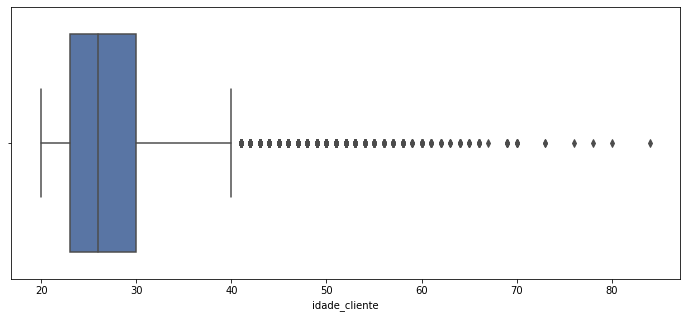

In [18]:
plt.subplots(figsize = (12,5))
sns.set_theme(style='darkgrid')
sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.boxplot(x = alura_cash_completa['idade_cliente']);

In [19]:
alura_cash_completa[alura_cash_completa['idade_cliente'] > 75]

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
6595,76.0,75000.0,Alugada,23.0,Médico,A,15000.0,8.94,0.0,0.20,N,25.0
6665,84.0,94800.0,Hipoteca,2.0,Pessoal,A,10000.0,7.51,0.0,0.11,N,24.0
21389,78.0,48000.0,Alugada,41.0,Médico,A,3000.0,7.51,0.0,0.06,N,25.0
27669,80.0,64000.0,Alugada,7.0,Médico,B,6800.0,11.71,0.0,0.11,N,25.0


Começando pelo outlier de ‘idade’, fui verificar os mais extremos à direita, clientes com mais de 75 anos. 

Achei estranho o fato de uma pessoa de 84 anos só ter trabalhado 2 e outro cliente de 80 anos, 7. Porém, este dado pode ser referente a um registro de trabalho com carteira assinada, ou seja, um emprego formal, desconsiderando os outros tipos. 

Em situações normais, eu iria verificar a questão com o responsável pelo banco de dados e tirar esta dúvida, mas como não há esta possibilidade, eu decidi manter ambos os casos.

In [20]:
alura_cash_completa[alura_cash_completa['idade_cliente'] < 21]

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
999,20.0,77000.0,Hipoteca,4.0,Empreender,A,6000.0,8.00,0.0,0.08,N,2.0
2560,20.0,42000.0,Alugada,4.0,Empreender,B,6500.0,11.71,0.0,0.15,N,2.0
3742,20.0,135000.0,Hipoteca,1.0,Empreender,C,15000.0,15.96,0.0,0.11,S,2.0
8386,20.0,65000.0,Hipoteca,4.0,Empreender,B,4800.0,9.99,0.0,0.07,N,4.0
11544,20.0,188004.0,Hipoteca,4.0,Educação,A,2000.0,8.59,0.0,0.01,N,4.0
11650,20.0,32652.0,Hipoteca,0.0,Pessoal,D,6000.0,14.61,1.0,0.18,N,4.0
11998,20.0,188004.0,Hipoteca,4.0,Pessoal,A,2000.0,8.59,0.0,0.01,N,2.0
15394,20.0,34800.0,Alugada,3.0,Médico,C,7000.0,13.61,0.0,0.20,S,2.0
19461,20.0,77052.0,Hipoteca,4.0,Educação,B,24250.0,11.36,0.0,0.31,N,2.0
19859,20.0,115731.0,Hipoteca,4.0,Pagar dívidas,B,9625.0,10.74,0.0,0.08,N,3.0


E ao verificar a extremidade esquerda, não encontrei nada de incomum nos registros dos clientes com 20 anos de idade.

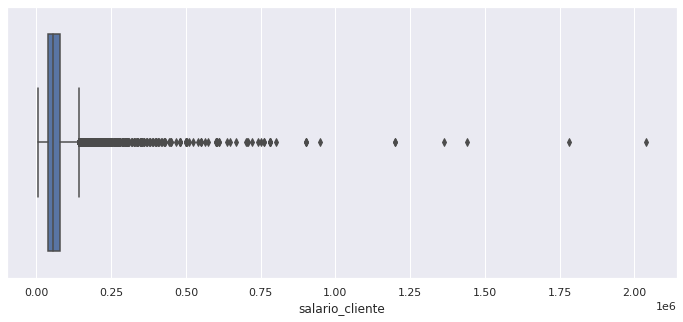

In [21]:
plt.subplots(figsize = (12,5))
sns.boxplot(x = alura_cash_completa['salario_cliente']);

In [22]:
alura_cash_completa[alura_cash_completa['salario_cliente'] >= 750000]

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
336,37.0,780000.0,Alugada,9.0,Empreender,B,7500.0,12.18,0.0,0.01,N,13.0
3016,43.0,780000.0,Hipoteca,2.0,Reforma,A,1000.0,8.94,0.0,0.00,N,11.0
4399,34.0,948000.0,Hipoteca,18.0,Pessoal,B,2000.0,9.99,0.0,0.00,N,7.0
4503,42.0,2039784.0,Alugada,0.0,Empreender,C,8450.0,12.29,0.0,0.00,S,15.0
5161,32.0,1200000.0,Hipoteca,1.0,Empreender,A,12000.0,7.51,0.0,0.01,N,8.0
6623,58.0,780000.0,Hipoteca,7.0,Pessoal,A,4500.0,6.91,0.0,0.01,N,19.0
7443,35.0,762000.0,Própria,8.0,Médico,A,10000.0,8.94,0.0,0.01,N,10.0
16716,37.0,900000.0,Hipoteca,5.0,Pessoal,C,25000.0,12.87,0.0,0.03,S,13.0
17694,58.0,780000.0,Hipoteca,7.0,Pessoal,A,4500.0,6.91,0.0,0.01,N,20.0
18058,63.0,1782000.0,Alugada,13.0,Educação,C,12025.0,14.27,0.0,0.01,N,30.0


Já para a variável ‘salário’, todos os clientes que possuem renda maior do que 750.000/ano, pediram um empréstimo de, no máximo, $30.000. O que gerou baixos percentuais (empréstimo/salário anual do cliente), de 0,0 à 0,4. 

Nestes casos, não houve inadimplência no empréstimo, o que reforçaria a resposta de que: 

se o percentual for baixo, o cliente irá pagar corretamente. 

Por isso decidi apagar estes registros.

In [23]:
# altos_salarios = alura_cash_completa[alura_cash_completa['salario_cliente'] >= 750000]
# alura_cash_completa = alura_cash_completa.drop(labels = altos_salarios.index)
# alura_cash_completa

In [24]:
# plt.subplots(figsize = (12,5))
# sns.boxplot(x = alura_cash_completa['salario_cliente']);

In [25]:
# alura_cash_completa[alura_cash_completa['salario_cliente'] >= 550000]

Ao fazer um novo boxplot e analisando clientes com salário anual maior do que 550.000, foi possível identificar casos de inadimplência, mesmo com percentual de empréstimo baixo e histórico positivo, ou seja, em que o cliente havia pago corretamente as dívidas anteriores. 

Por isso, decidi manter estes outliers.

In [26]:
alura_cash_completa[alura_cash_completa['salario_cliente'] < 8000]

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
618,37.0,6000.0,Própria,3.0,Empreender,A,1300.0,6.03,1.0,0.22,N,11.0
1188,37.0,7200.0,Alugada,0.0,Empreender,B,1000.0,11.14,0.0,0.14,N,13.0
1260,24.0,7500.0,Alugada,0.0,Reforma,C,1200.0,13.48,1.0,0.16,N,4.0
3920,41.0,4000.0,Alugada,0.0,Médico,C,2000.0,13.22,1.0,0.50,S,15.0
6289,24.0,7800.0,Alugada,1.0,Educação,B,1000.0,11.36,0.0,0.13,N,4.0
8024,22.0,4800.0,Alugada,1.0,Pessoal,D,1800.0,14.84,1.0,0.38,S,2.0
10273,25.0,5000.0,Alugada,0.0,Empreender,B,1000.0,9.64,1.0,0.20,N,4.0
10491,22.0,4800.0,Alugada,0.0,Médico,C,1200.0,14.26,1.0,0.25,S,2.0
12768,26.0,7904.0,Hipoteca,0.0,Reforma,B,500.0,10.71,0.0,0.06,N,3.0
16530,21.0,4200.0,Alugada,3.0,Pessoal,E,2750.0,16.95,1.0,0.65,N,3.0


E para a extremidade inferior, para os clientes que ganham menos do que 8.000/ano, os percentuais de empréstimo são maiores e com mais ocorrência de inadimplência. Eu cogitei a possibilidade de apagar estes registros, mas decidi mantê-los, porque não os considerei como outliers, pois, na maioria das sociedades, é comum ter uma maior parte da população ganhando baixos salários. 

E aqui, tive um “conflito”: 

se eu estaria reforçando o preceito de que pessoas com baixo salário se tornariam inadimplentes. 

Já que a maioria dos clientes selecionados, que não tinham histórico devedor, se tornaram inadimplentes e não pagaram o empréstimo. Vendo por este ponto de vista, assim como eu apaguei os cliente com altos salários, eu decidi apagar estes clientes também.

In [27]:
# baixos_salarios = alura_cash_completa[alura_cash_completa['salario_cliente'] < 8000]
# alura_cash_completa = alura_cash_completa.drop(labels = baixos_salarios.index)
# alura_cash_completa



---

Debate no Discord: Depois que havia finalizado a etapa dos outliers, vi como esta questão poderia ser resolvida. A dica foi sobre tratar os dados, para reduzir a diferença dos salários, normalizar a variável, retirando a necessidade de apagar mais dados.

A normalização será feita posteriormente.

---



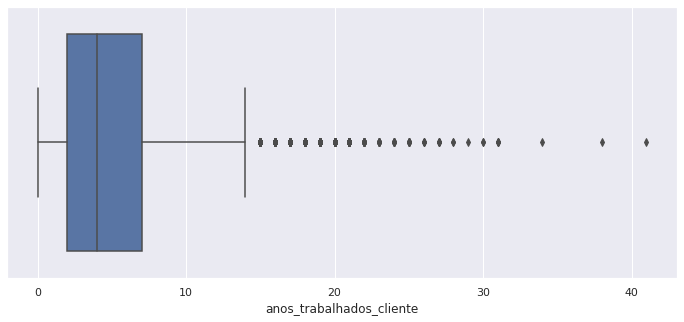

In [28]:
plt.subplots(figsize = (12,5))
sns.boxplot(x = alura_cash_completa['anos_trabalhados_cliente']);

In [29]:
alura_cash_completa[alura_cash_completa['anos_trabalhados_cliente'] > 25]

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
2707,47.0,178000.0,Própria,31.0,Empreender,B,9000.0,10.99,0.0,0.05,N,17.0
5203,43.0,60000.0,Hipoteca,27.0,Reforma,B,10000.0,9.88,0.0,0.17,N,16.0
5483,46.0,180000.0,Hipoteca,31.0,Empreender,B,18000.0,9.91,0.0,0.10,N,11.0
5537,42.0,57996.0,Alugada,26.0,Empreender,A,6000.0,8.59,0.0,0.10,N,12.0
6396,61.0,148000.0,Hipoteca,30.0,Pagar dívidas,B,24000.0,10.38,1.0,0.16,N,20.0
12615,58.0,49000.0,Hipoteca,34.0,Médico,D,7500.0,13.55,1.0,0.15,S,24.0
13912,61.0,160000.0,Hipoteca,30.0,Pessoal,B,24000.0,10.38,0.0,0.15,N,21.0
14064,62.0,62050.0,Hipoteca,29.0,Médico,C,25000.0,13.43,1.0,0.34,S,28.0
14634,48.0,70000.0,Hipoteca,31.0,Reforma,D,9000.0,14.54,0.0,0.13,N,17.0
15513,44.0,80000.0,Hipoteca,28.0,Reforma,D,25000.0,15.33,0.0,0.31,N,11.0


Em relação aos ‘anos trabalhados’, eu não encontrei registros atípicos para os clientes que trabalharam mais do que 25 anos.

In [30]:
alura_cash_completa[alura_cash_completa['anos_trabalhados_cliente'] == 0]

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
33,22.0,24000.0,Alugada,0.0,Pagar dívidas,C,5200.0,13.49,0.0,0.22,S,2.0
46,23.0,32388.0,Hipoteca,0.0,Educação,B,6000.0,10.71,0.0,0.19,N,4.0
62,23.0,30000.0,Alugada,0.0,Pessoal,B,1925.0,12.18,0.0,0.06,N,2.0
86,39.0,18300.0,Alugada,0.0,Educação,D,1200.0,14.74,1.0,0.07,N,17.0
90,24.0,40944.0,Alugada,0.0,Médico,B,8200.0,11.36,0.0,0.20,N,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34457,23.0,60000.0,Hipoteca,0.0,Médico,B,15000.0,10.37,0.0,0.25,N,4.0
34461,24.0,55800.0,Hipoteca,0.0,Empreender,A,3200.0,7.68,0.0,0.06,N,3.0
34469,25.0,63000.0,Hipoteca,0.0,Educação,D,25000.0,13.87,0.0,0.40,N,2.0
34486,22.0,24000.0,Alugada,0.0,Educação,E,1500.0,18.79,1.0,0.06,S,3.0


In [31]:
nunca_trabalhou = alura_cash_completa[alura_cash_completa['anos_trabalhados_cliente'] == 0]

In [32]:
nunca_trabalhou['idade_cliente'].value_counts()

23.0    462
22.0    428
24.0    418
25.0    319
26.0    285
27.0    229
28.0    193
29.0    172
21.0    154
31.0    131
30.0    129
32.0    106
33.0    104
34.0     87
35.0     78
37.0     69
36.0     60
38.0     45
39.0     40
42.0     25
43.0     23
41.0     22
40.0     21
46.0     14
44.0     13
45.0     13
52.0     10
48.0     10
50.0      8
53.0      7
47.0      6
49.0      4
58.0      4
56.0      3
62.0      2
70.0      2
64.0      2
51.0      2
60.0      1
63.0      1
55.0      1
73.0      1
20.0      1
54.0      1
57.0      1
65.0      1
Name: idade_cliente, dtype: int64

In [33]:
nunca_trabalhou.describe()

,idade_cliente,salario_cliente,anos_trabalhados_cliente,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,a_quanto_tempo_tem_cartao_credito
count,3708.000000,3.708000e+03,3708.0,3708.000000,3708.000000,3708.000000,3708.000000,3708.000000
mean,27.741640,5.783464e+04,0.0,8567.543150,11.216618,0.282093,0.174040,5.787217
std,6.378928,5.025020e+04,0.0,5822.020636,3.160183,0.450079,0.108584,4.132324
min,20.000000,4.000000e+03,0.0,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.120000e+04,0.0,4350.000000,8.590000,0.000000,0.090000,3.000000
50%,26.000000,4.800000e+04,0.0,7000.000000,11.140000,0.000000,0.150000,4.000000
75%,30.000000,7.280000e+04,0.0,12000.000000,13.490000,1.000000,0.230000,8.000000
max,73.000000,2.039784e+06,0.0,35000.000000,21.360000,1.000000,0.830000,30.000000


E ao verificar os clientes que nunca trabalharam, suas idades não ficaram restritas a pessoas com 20 e poucos anos. Como eu já havia comentado, o banco de dados pode estar considerando apenas trabalhos formais e com vínculo empregatício. Por isso, vou manter estes registros.

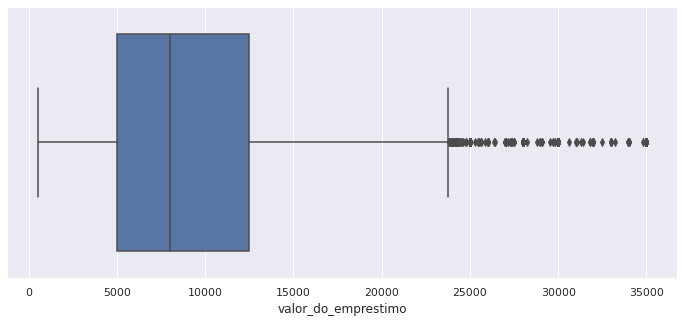

In [34]:
plt.subplots(figsize = (12,5))
sns.boxplot(x = alura_cash_completa['valor_do_emprestimo']);

In [35]:
alura_cash_completa[alura_cash_completa['valor_do_emprestimo'] > 34000]

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
106,34.0,89000.0,Alugada,3.0,Reforma,D,35000.0,18.25,1.0,0.39,N,8.0
265,30.0,270000.0,Hipoteca,7.0,Reforma,E,35000.0,19.69,0.0,0.13,N,8.0
302,30.0,144000.0,Hipoteca,12.0,Pessoal,C,35000.0,12.68,0.0,0.24,N,8.0
365,26.0,213000.0,Hipoteca,6.0,Educação,B,35000.0,10.65,1.0,0.16,N,2.0
501,22.0,60350.0,Hipoteca,6.0,Médico,D,35000.0,16.89,1.0,0.49,N,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33728,27.0,78200.0,Própria,4.0,Médico,E,35000.0,17.99,1.0,0.38,S,7.0
33782,29.0,104000.0,Hipoteca,7.0,Pagar dívidas,A,35000.0,7.49,0.0,0.34,N,8.0
33977,37.0,123000.0,Hipoteca,1.0,Pessoal,C,35000.0,14.27,0.0,0.28,S,16.0
34309,28.0,250000.0,Hipoteca,3.0,Pessoal,B,35000.0,11.71,0.0,0.14,N,7.0


Não encontrei nada relevante nos outliers referentes ao ‘valor do empréstimo’, por isso não apaguei nenhum registro. Mas identifiquei um padrão na variável ‘pontuação empréstimo’, juros de até 10,0% são classificados como ‘A’, a partir de 10 a classificação passa a ser como ‘B’, o cliente com juros de 12,68% recebeu uma pontuação ‘C’, o empréstimo com 16,89% de juros teve uma pontuação ‘D’, enquanto o empréstimo com 17,99% teve uma pontuação ‘E’.


In [36]:
alura_cash_completa[alura_cash_completa['valor_do_emprestimo'] < 1000]

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
499,25.0,19000.0,Alugada,0.0,Pagar dívidas,C,750.0,12.29,0.0,0.04,S,4.0
1983,32.0,12000.0,Alugada,3.0,Médico,C,900.0,10.28,1.0,0.07,N,5.0
4849,26.0,19500.0,Alugada,0.0,Médico,C,500.0,11.41,0.0,0.03,N,2.0
6345,27.0,12000.0,Alugada,1.0,Pagar dívidas,A,725.0,7.37,0.0,0.06,N,6.0
12768,26.0,7904.0,Hipoteca,0.0,Reforma,B,500.0,10.71,0.0,0.06,N,3.0
16412,26.0,59000.0,Hipoteca,7.0,Reforma,B,500.0,9.76,0.0,0.01,N,2.0
23804,22.0,26000.0,Hipoteca,3.0,Pessoal,B,500.0,10.46,0.0,0.02,N,4.0
24458,25.0,57000.0,Própria,4.0,Médico,A,900.0,8.63,0.0,0.02,N,4.0
25602,21.0,19000.0,Alugada,0.0,Educação,C,700.0,12.29,0.0,0.04,N,2.0
33143,21.0,35000.0,Hipoteca,2.0,Empreender,A,800.0,7.37,0.0,0.02,N,3.0


Ao analisar a extremidade esquerda de ‘valor do empréstimo’, também não identifiquei nenhuma anomalia nos registros. Porém voltei minha atenção para a pontuação que estes registros receberam. O padrão que identifiquei no texto anterior estava sendo seguido, mas com ressalvas:

Juros menores do que 10% ainda estavam sendo considerados como ‘A’, o maior deles sendo de 8,63%. Os que foram classificados como ‘B’ tinham no mínimo 9,76% e foram até 10,71%. Mas houve divergência nos registros classificados com pontuação ‘C’, que foi de 10,28 até 12,29. A única explicação que encontrei para este registro de 10,28% ser classificado como ‘C’, e não como ‘B’, é que este cliente não pagou o empréstimo.

Recorri ao dicionário dos dados para verificar as características da variável e se havia uma melhor explicação do que ela seria, e a única informação é de que a variável é referente a “Pontuação de empréstimo”. 

Talvez seja uma forma de sinalizar o quanto, aproximadamente, deverá ser a taxa mínima de juros do próximo empréstimo que a pessoa solicitar.

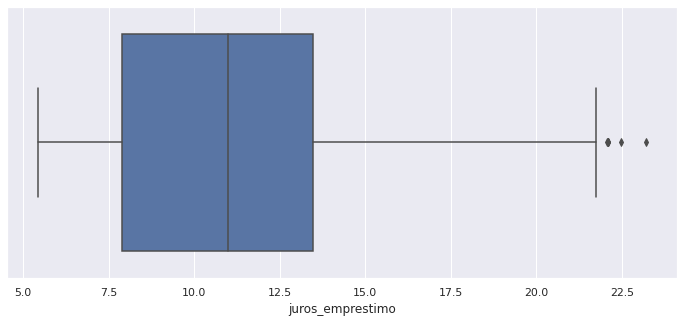

In [37]:
plt.subplots(figsize = (12,5))
sns.boxplot(x = alura_cash_completa['juros_emprestimo']);

In [38]:
alura_cash_completa[alura_cash_completa['juros_emprestimo'] > 22]

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
5781,23.0,34255.0,Alugada,7.0,Empreender,G,6000.0,22.11,1.0,0.18,S,3.0
8159,31.0,22000.0,Alugada,5.0,Empreender,F,1400.0,22.06,0.0,0.06,S,7.0
9428,38.0,83000.0,Alugada,3.0,Reforma,G,22250.0,23.22,1.0,0.27,S,12.0
15774,28.0,288000.0,Hipoteca,12.0,Empreender,G,18000.0,22.48,1.0,0.06,S,9.0
22641,28.0,128000.0,Hipoteca,11.0,Pagar dívidas,G,14400.0,22.11,1.0,0.11,S,8.0
29728,26.0,44000.0,Alugada,4.0,Reforma,G,12500.0,22.11,1.0,0.28,S,2.0


In [39]:
alura_cash_completa[alura_cash_completa['juros_emprestimo'] < 7]

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
11,23.0,54000.0,Hipoteca,2.0,Empreender,A,7000.0,6.62,0.0,0.13,N,3.0
36,32.0,86400.0,Hipoteca,16.0,Médico,A,8000.0,6.03,0.0,0.09,N,10.0
39,31.0,60000.0,Hipoteca,5.0,Médico,A,7200.0,6.03,0.0,0.12,N,8.0
40,23.0,45000.0,Alugada,4.0,Educação,A,9000.0,5.99,0.0,0.20,N,3.0
44,27.0,125000.0,Hipoteca,1.0,Reforma,A,24000.0,6.91,0.0,0.19,N,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34465,44.0,40000.0,Hipoteca,8.0,Empreender,A,8000.0,6.62,0.0,0.20,N,13.0
34467,29.0,57000.0,Hipoteca,4.0,Médico,A,2500.0,6.76,0.0,0.04,N,7.0
34481,33.0,40000.0,Própria,2.0,Médico,A,14000.0,6.91,0.0,0.35,N,8.0
34485,21.0,37200.0,Hipoteca,3.0,Médico,A,16800.0,6.17,1.0,0.45,N,2.0


Em relação aos outliers do ‘juros empréstimo’, foi possível identificar que os empréstimos com altas taxas de juros receberam uma Pontuação ‘F’ ou ‘G’, enquanto os empréstimos com juros menores receberam Pontuação ‘A’. O que reforça a hipótese de que a variável ‘pontuação’ tem relação com os juros dos empréstimos.

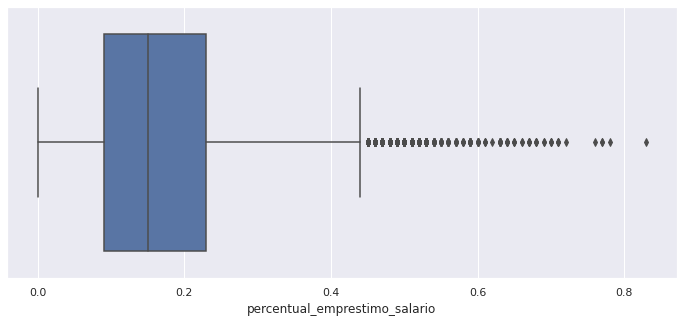

In [40]:
plt.subplots(figsize = (12,5))
sns.boxplot(x = alura_cash_completa['percentual_emprestimo_salario']);

In [41]:
alura_cash_completa[alura_cash_completa['percentual_emprestimo_salario'] > 0.65]

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
517,27.0,12000.0,Própria,0.0,Educação,D,8125.0,14.42,1.0,0.68,S,5.0
655,30.0,32004.0,Alugada,1.0,Pessoal,B,24250.0,11.12,1.0,0.76,N,5.0
3991,31.0,30372.0,Alugada,2.0,Pessoal,D,20200.0,14.74,1.0,0.67,S,5.0
4199,25.0,32004.0,Hipoteca,3.0,Pessoal,A,22750.0,6.17,0.0,0.71,N,4.0
8758,22.0,8000.0,Alugada,0.0,Empreender,A,5400.0,7.75,1.0,0.68,N,4.0
9185,23.0,30000.0,Alugada,6.0,Empreender,B,19750.0,11.14,1.0,0.66,N,4.0
9984,22.0,31000.0,Alugada,5.0,Pagar dívidas,B,21250.0,12.42,1.0,0.69,N,3.0
12838,21.0,13000.0,Alugada,0.0,Pagar dívidas,C,9250.0,12.53,1.0,0.71,N,3.0
13119,33.0,10080.0,Própria,11.0,Empreender,A,7200.0,6.03,1.0,0.71,N,8.0
14916,23.0,30000.0,Alugada,6.0,Empreender,B,19750.0,11.14,1.0,0.66,N,4.0


A variável ‘percentual empréstimo salário’ é a divisão entre o empréstimo e o salário anual do cliente, ou seja, uma forma de demonstrar o quanto da renda anual poderia ser usada para pagar o empréstimo. Decidi manter os outliers, porque, apesar da maioria ter se tornado inadimplente, houve casos de pagamento correto do empréstimo, mesmo com o percentual superior a 0,8.

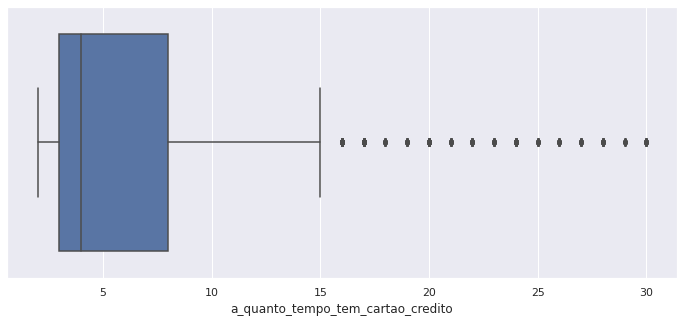

In [42]:
plt.subplots(figsize = (12,5))
sns.boxplot(x = alura_cash_completa['a_quanto_tempo_tem_cartao_credito']);

In [43]:
alura_cash_completa[alura_cash_completa['a_quanto_tempo_tem_cartao_credito'] > 28]

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
325,58.0,68000.0,Hipoteca,1.0,Pessoal,B,8000.0,10.99,0.0,0.12,N,29.0
531,53.0,95000.0,Própria,24.0,Pessoal,A,6000.0,5.42,0.0,0.06,N,30.0
3305,53.0,304800.0,Alugada,6.0,Empreender,B,5000.0,8.88,0.0,0.02,N,29.0
7873,58.0,20000.0,Alugada,0.0,Educação,B,4000.0,9.99,0.0,0.20,N,30.0
8271,54.0,33600.0,Alugada,0.0,Pagar dívidas,B,1000.0,10.65,1.0,0.03,N,29.0
10569,52.0,163000.0,Hipoteca,9.0,Pessoal,D,25000.0,14.11,1.0,0.15,N,30.0
10857,66.0,42000.0,Alugada,2.0,Médico,B,6475.0,9.99,0.0,0.15,N,30.0
13101,59.0,55000.0,Hipoteca,15.0,Pessoal,B,1000.0,10.59,0.0,0.02,N,29.0
14208,62.0,76500.0,Alugada,0.0,Educação,D,20000.0,16.77,1.0,0.26,S,29.0
16757,57.0,53000.0,Hipoteca,1.0,Pessoal,C,5800.0,13.16,0.0,0.11,S,30.0


In [44]:
alura_cash_completa[alura_cash_completa['a_quanto_tempo_tem_cartao_credito'] < 3]

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
1,24.0,12600.0,Alugada,2.0,Empreender,C,2500.0,13.11,1.0,0.20,S,2.0
15,22.0,66300.0,Alugada,3.0,Médico,D,7500.0,14.96,1.0,0.10,N,2.0
16,26.0,65000.0,Hipoteca,11.0,Empreender,A,12000.0,7.90,0.0,0.18,N,2.0
17,26.0,120000.0,Hipoteca,10.0,Reforma,D,10000.0,14.59,0.0,0.08,S,2.0
20,26.0,105000.0,Hipoteca,6.0,Pagar dívidas,B,12000.0,11.99,0.0,0.11,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
34469,25.0,63000.0,Hipoteca,0.0,Educação,D,25000.0,13.87,0.0,0.40,N,2.0
34472,24.0,38000.0,Hipoteca,3.0,Pagar dívidas,B,16000.0,10.99,0.0,0.42,N,2.0
34475,26.0,59000.0,Hipoteca,4.0,Educação,B,3500.0,10.99,0.0,0.06,N,2.0
34477,26.0,69000.0,Hipoteca,10.0,Reforma,D,6200.0,15.99,1.0,0.09,N,2.0


E, por fim, não identifiquei nenhum problema com os outliers da variável ‘tempo com cartão de crédito’.

## Correção das variáveis

Em relação à atividade ‘Correção de dados’, eu entendi que deveríamos corrigir os tipos de variáveis, por exemplo ‘Idade’ passar para o tipo inteiro.

In [45]:
alura_cash_completa.sample(10)

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
19859,20.0,115731.0,Hipoteca,4.0,Pagar dívidas,B,9625.0,10.74,0.0,0.08,N,3.0
1607,30.0,36000.0,Hipoteca,3.0,Reforma,B,2400.0,10.65,0.0,0.07,N,10.0
32010,24.0,34000.0,Hipoteca,0.0,Pagar dívidas,B,10000.0,12.18,0.0,0.29,N,4.0
11911,25.0,65000.0,Alugada,2.0,Educação,C,10000.0,13.79,0.0,0.15,S,3.0
20144,27.0,25200.0,Alugada,2.0,Empreender,A,1800.0,6.76,0.0,0.07,N,10.0
5426,29.0,42000.0,Alugada,6.0,Pagar dívidas,D,10800.0,16.29,1.0,0.26,S,7.0
27381,21.0,90000.0,Outros,5.0,Médico,B,16000.0,11.26,0.0,0.18,N,4.0
20365,25.0,68000.0,Alugada,4.0,Pessoal,B,11200.0,11.99,0.0,0.16,N,2.0
10473,26.0,40000.0,Alugada,3.0,Pagar dívidas,B,5000.0,9.45,0.0,0.13,N,3.0
21604,27.0,119000.0,Hipoteca,7.0,Pagar dívidas,D,30000.0,18.25,1.0,0.25,N,7.0


In [46]:
alura_cash_completa['idade_cliente'] = alura_cash_completa['idade_cliente'].apply(np.int64)
alura_cash_completa['anos_trabalhados_cliente'] = alura_cash_completa['anos_trabalhados_cliente'].apply(np.int64)
alura_cash_completa['inadimplencia_emprestimo'] = alura_cash_completa['inadimplencia_emprestimo'].apply(np.int64)
alura_cash_completa['a_quanto_tempo_tem_cartao_credito'] = alura_cash_completa['a_quanto_tempo_tem_cartao_credito'].apply(np.int64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [47]:
alura_cash_completa.sample(5)

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
19954,23,65000.0,Hipoteca,7,Educação,A,5500.0,7.88,0,0.08,N,2
7702,22,50000.0,Hipoteca,7,Educação,A,6400.0,8.00,0,0.13,N,2
22459,24,80004.0,Hipoteca,8,Empreender,A,6000.0,8.63,0,0.07,N,4
16770,36,60072.0,Alugada,14,Reforma,B,2500.0,11.49,1,0.04,N,16
30012,22,70000.0,Hipoteca,5,Pagar dívidas,B,21000.0,8.88,0,0.30,N,3


## Aplicar encoding nas variáveis categóricas

Sobre o encoding, encontrei um artigo bem interessante, explicando como fazer a identificação das variáveis do tipo categórica e como fazer seus respectivos encodings.

https://www.aprendadatascience.com/blog/an%C3%A1lise-explorat%C3%B3ria-de-dados/vari%C3%A1veis-categ%C3%B3ricas-enconding

O artigo sugere que, para as variáveis do tipo nominal, seja criado uma nova coluna para cada valor distinto presente na variável, fazendo com que cada linha receba 0 ou 1 nas novas colunas, conhecido como codificação ‘one-hot’. 

No caso deste Dataframe, as variáveis ‘tipo de casa’, ‘motivo do empréstimo’ e ‘histórico inadimplência’ são do tipo nominal. Porém, no caso do ‘histórico’ eu posso fazer um mapeamento de dados e trocar ‘N’ por 0 e ‘S’ por 1.

E para a variável ‘pontuação’, por haver uma ordem entre os dados, também posso fazer um mapeamento dos dados, em que pontuações do tipo ‘A’ recebem 1 e pontuações ‘G’ recebem 7.


### One-hot encoding

Para me ajudar nesta etapa, segui o processo ensinado no vídeo do canal [Programação Dinâmica](https://www.youtube.com/watch?v=ZPTAeXfaZ4g). A Kizzy apresenta como utilizar o OneHotEncoder, que é um módulo do Scikit Learn próprio para fazer codificações de variáveis.

In [48]:
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 4.4 MB/s 


In [49]:
from category_encoders.one_hot import OneHotEncoder

In [50]:
alura_cash_completa['tipo_casa_cliente'].value_counts()

Alugada     14548
Hipoteca    11798
Própria      2192
Outros         94
Name: tipo_casa_cliente, dtype: int64

In [51]:
one_hot_casa = OneHotEncoder(cols=['tipo_casa_cliente'])

In [52]:
alura_cash_ohe_casa = one_hot_casa.fit_transform(alura_cash_completa)
alura_cash_ohe_casa

,idade_cliente,salario_cliente,tipo_casa_cliente_1,tipo_casa_cliente_2,tipo_casa_cliente_3,tipo_casa_cliente_4,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
0,27,68000.0,1,0,0,0,4,Reforma,A,8700.0,7.88,0,0.13,N,5
1,24,12600.0,1,0,0,0,2,Empreender,C,2500.0,13.11,1,0.20,S,2
2,30,100000.0,1,0,0,0,13,Pagar dívidas,A,12000.0,7.88,0,0.12,N,9
4,30,110400.0,1,0,0,0,1,Empreender,D,14000.0,16.89,1,0.13,N,6
6,24,117996.0,0,1,0,0,6,Empreender,E,18000.0,17.04,0,0.15,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,49,64600.0,0,1,0,0,4,Médico,D,10000.0,16.49,1,0.13,N,12
34496,23,80500.0,1,0,0,0,5,Empreender,B,7200.0,9.25,0,0.09,N,3
34497,39,56000.0,0,1,0,0,14,Pessoal,C,10000.0,12.73,0,0.18,S,12
34498,28,29000.0,1,0,0,0,1,Médico,C,8000.0,13.11,1,0.28,S,9


Mas este módulo não cria as novas colunas com os valores presentes na variável, ou seja, foram criadas as colunas `tipo_casa_cliente_1`, `tipo_casa_cliente_2` e etc, não deixando claro o tipo de imóvel que o cliente se encontra.

Eu gostaria que o dataframe tivesse as seguintes colunas:

In [53]:
pd.get_dummies(alura_cash_completa.tipo_casa_cliente)

,Alugada,Hipoteca,Outros,Própria
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
4,1,0,0,0
6,0,1,0,0
...,...,...,...,...
34495,0,1,0,0
34496,1,0,0,0
34497,0,1,0,0
34498,1,0,0,0


Ao comparar com esta tabela do get_dummies, eu consigo identificar que ‘tipo_casa_cliente_1’ refere-se a casa alugada e ‘tipo_casa_cliente_2’ são casas hipotecadas. Mas eu não consigo distinguir o tipo das outras duas colunas apenas olhando as 5 primeiras e 5 últimas linhas. A solução que encontrei foi:

Ver algumas linhas do dataframe que são casas do tipo ‘Outros’;

In [54]:
alura_cash_completa[alura_cash_completa['tipo_casa_cliente'] == 'Outros']

,idade_cliente,salario_cliente,tipo_casa_cliente,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
486,31,72250.0,Outros,6,Médico,F,25000.0,17.03,1,0.29,S,5
750,29,58000.0,Outros,0,Reforma,B,14000.0,11.83,0,0.24,N,8
1230,21,34000.0,Outros,3,Empreender,E,9600.0,15.68,1,0.28,S,2
3089,46,85000.0,Outros,0,Reforma,A,1000.0,7.68,0,0.01,N,12
4018,28,58600.0,Outros,1,Reforma,A,4550.0,8.00,0,0.08,N,8
...,...,...,...,...,...,...,...,...,...,...,...,...
32996,44,83000.0,Outros,2,Educação,D,12000.0,16.00,1,0.14,S,15
33641,22,25992.0,Outros,6,Pagar dívidas,B,3000.0,9.45,0,0.12,N,3
33713,26,19200.0,Outros,0,Pessoal,C,7500.0,11.97,1,0.39,S,2
33784,24,48000.0,Outros,5,Empreender,B,7800.0,11.89,0,0.16,N,4


Escolher apenas uma delas e ver em qual tipo de casa ela se enquadra (`tipo_casa_cliente_3` ou `tipo_casa_cliente_4`)

In [55]:
alura_cash_ohe_casa['tipo_casa_cliente_3'][486]

0

In [56]:
alura_cash_ohe_casa['tipo_casa_cliente_4'][486]

1

Feito isso, eu consigo alterar os nomes das colunas:

In [57]:
alura_cash_ohe_casa.rename(columns={'tipo_casa_cliente_1' : 'casa_alugada',
                                    'tipo_casa_cliente_2' : 'casa_hipoteca',
                                    'tipo_casa_cliente_3' : 'casa_propria',
                                    'tipo_casa_cliente_4' : 'casa_outros'}, inplace = True)
alura_cash_ohe_casa

,idade_cliente,salario_cliente,casa_alugada,casa_hipoteca,casa_propria,casa_outros,anos_trabalhados_cliente,motivo_emprestimo,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
0,27,68000.0,1,0,0,0,4,Reforma,A,8700.0,7.88,0,0.13,N,5
1,24,12600.0,1,0,0,0,2,Empreender,C,2500.0,13.11,1,0.20,S,2
2,30,100000.0,1,0,0,0,13,Pagar dívidas,A,12000.0,7.88,0,0.12,N,9
4,30,110400.0,1,0,0,0,1,Empreender,D,14000.0,16.89,1,0.13,N,6
6,24,117996.0,0,1,0,0,6,Empreender,E,18000.0,17.04,0,0.15,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,49,64600.0,0,1,0,0,4,Médico,D,10000.0,16.49,1,0.13,N,12
34496,23,80500.0,1,0,0,0,5,Empreender,B,7200.0,9.25,0,0.09,N,3
34497,39,56000.0,0,1,0,0,14,Pessoal,C,10000.0,12.73,0,0.18,S,12
34498,28,29000.0,1,0,0,0,1,Médico,C,8000.0,13.11,1,0.28,S,9


Fazendo o mesmo com a coluna `motivo_emprestimo`:

In [58]:
alura_cash_completa['motivo_emprestimo'].value_counts()

Educação         5702
Médico           5293
Empreender       4999
Pessoal          4875
Pagar dívidas    4565
Reforma          3198
Name: motivo_emprestimo, dtype: int64

In [59]:
one_hot_motivo = OneHotEncoder(cols=['motivo_emprestimo'])

In [60]:
alura_cash_ohe_emprestimo = one_hot_motivo.fit_transform(alura_cash_ohe_casa)
alura_cash_ohe_emprestimo

,idade_cliente,salario_cliente,casa_alugada,casa_hipoteca,casa_propria,casa_outros,anos_trabalhados_cliente,motivo_emprestimo_1,motivo_emprestimo_2,motivo_emprestimo_3,motivo_emprestimo_4,motivo_emprestimo_5,motivo_emprestimo_6,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
0,27,68000.0,1,0,0,0,4,1,0,0,0,0,0,A,8700.0,7.88,0,0.13,N,5
1,24,12600.0,1,0,0,0,2,0,1,0,0,0,0,C,2500.0,13.11,1,0.20,S,2
2,30,100000.0,1,0,0,0,13,0,0,1,0,0,0,A,12000.0,7.88,0,0.12,N,9
4,30,110400.0,1,0,0,0,1,0,1,0,0,0,0,D,14000.0,16.89,1,0.13,N,6
6,24,117996.0,0,1,0,0,6,0,1,0,0,0,0,E,18000.0,17.04,0,0.15,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,49,64600.0,0,1,0,0,4,0,0,0,1,0,0,D,10000.0,16.49,1,0.13,N,12
34496,23,80500.0,1,0,0,0,5,0,1,0,0,0,0,B,7200.0,9.25,0,0.09,N,3
34497,39,56000.0,0,1,0,0,14,0,0,0,0,1,0,C,10000.0,12.73,0,0.18,S,12
34498,28,29000.0,1,0,0,0,1,0,0,0,1,0,0,C,8000.0,13.11,1,0.28,S,9


In [61]:
pd.get_dummies(alura_cash_completa.motivo_emprestimo)

,Educação,Empreender,Médico,Pagar dívidas,Pessoal,Reforma
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,0,0,0,1,0,0
4,0,1,0,0,0,0
6,0,1,0,0,0,0
...,...,...,...,...,...,...
34495,0,0,1,0,0,0
34496,0,1,0,0,0,0
34497,0,0,0,0,1,0
34498,0,0,1,0,0,0


E comparando as linhas apresentadas no ohe do `motivo_emprestimo` com o get_dummies:

motivo_emprestimo_1 = Reforma

motivo_emprestimo_2 = Empreender

motivo_emprestimo_3 = Pagar dívidas

motivo_emprestimo_4 = Médico

motivo_emprestimo_5 = Pessoal

motivo_emprestimo_6 = Educação

In [62]:
alura_cash_ohe_emprestimo.rename(columns={'motivo_emprestimo_1' : 'Reforma',
                                          'motivo_emprestimo_2' : 'Empreender',
                                          'motivo_emprestimo_3' : 'Dividas',
                                          'motivo_emprestimo_4' : 'Saude',
                                          'motivo_emprestimo_5' : 'Pessoal',
                                          'motivo_emprestimo_6' : 'Estudos'}, inplace = True)
alura_cash_ohe_emprestimo

,idade_cliente,salario_cliente,casa_alugada,casa_hipoteca,casa_propria,casa_outros,anos_trabalhados_cliente,Reforma,Empreender,Dividas,Saude,Pessoal,Estudos,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
0,27,68000.0,1,0,0,0,4,1,0,0,0,0,0,A,8700.0,7.88,0,0.13,N,5
1,24,12600.0,1,0,0,0,2,0,1,0,0,0,0,C,2500.0,13.11,1,0.20,S,2
2,30,100000.0,1,0,0,0,13,0,0,1,0,0,0,A,12000.0,7.88,0,0.12,N,9
4,30,110400.0,1,0,0,0,1,0,1,0,0,0,0,D,14000.0,16.89,1,0.13,N,6
6,24,117996.0,0,1,0,0,6,0,1,0,0,0,0,E,18000.0,17.04,0,0.15,S,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,49,64600.0,0,1,0,0,4,0,0,0,1,0,0,D,10000.0,16.49,1,0.13,N,12
34496,23,80500.0,1,0,0,0,5,0,1,0,0,0,0,B,7200.0,9.25,0,0.09,N,3
34497,39,56000.0,0,1,0,0,14,0,0,0,0,1,0,C,10000.0,12.73,0,0.18,S,12
34498,28,29000.0,1,0,0,0,1,0,0,0,1,0,0,C,8000.0,13.11,1,0.28,S,9


E no caso da variável referente ao `historico_inadimplencia`, como havia comentado, fiz uma substituição dos valores.

In [63]:
alura_cash_completa['historico_inadimplencia'].value_counts()

N    23530
S     5102
Name: historico_inadimplencia, dtype: int64

In [64]:
troca = {
    'N' : 0,
    'S' : 1
}
alura_cash_ohe_emprestimo['historico_inadimplencia'].replace(troca, inplace=True)

In [65]:
alura_cash_ohe_emprestimo

,idade_cliente,salario_cliente,casa_alugada,casa_hipoteca,casa_propria,casa_outros,anos_trabalhados_cliente,Reforma,Empreender,Dividas,Saude,Pessoal,Estudos,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
0,27,68000.0,1,0,0,0,4,1,0,0,0,0,0,A,8700.0,7.88,0,0.13,0,5
1,24,12600.0,1,0,0,0,2,0,1,0,0,0,0,C,2500.0,13.11,1,0.20,1,2
2,30,100000.0,1,0,0,0,13,0,0,1,0,0,0,A,12000.0,7.88,0,0.12,0,9
4,30,110400.0,1,0,0,0,1,0,1,0,0,0,0,D,14000.0,16.89,1,0.13,0,6
6,24,117996.0,0,1,0,0,6,0,1,0,0,0,0,E,18000.0,17.04,0,0.15,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,49,64600.0,0,1,0,0,4,0,0,0,1,0,0,D,10000.0,16.49,1,0.13,0,12
34496,23,80500.0,1,0,0,0,5,0,1,0,0,0,0,B,7200.0,9.25,0,0.09,0,3
34497,39,56000.0,0,1,0,0,14,0,0,0,0,1,0,C,10000.0,12.73,0,0.18,1,12
34498,28,29000.0,1,0,0,0,1,0,0,0,1,0,0,C,8000.0,13.11,1,0.28,1,9


### Ordinal encoding

In [66]:
alura_cash_completa['pontuacao_emprestimo'].value_counts()

A    9401
B    9149
C    5697
D    3247
E     870
F     209
G      59
Name: pontuacao_emprestimo, dtype: int64

In [67]:
# Para o import do OrdinalEncoder, eu poderia ter feito junto com o OneHotEncoder, mas achei melhor deixar separado.
from category_encoders.one_hot import OrdinalEncoder

In [68]:
codificacao_nominal = OrdinalEncoder(cols = ['pontuacao_emprestimo'])

In [69]:
codificacao_nominal.fit_transform(alura_cash_ohe_emprestimo)

,idade_cliente,salario_cliente,casa_alugada,casa_hipoteca,casa_propria,casa_outros,anos_trabalhados_cliente,Reforma,Empreender,Dividas,Saude,Pessoal,Estudos,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
0,27,68000.0,1,0,0,0,4,1,0,0,0,0,0,1,8700.0,7.88,0,0.13,0,5
1,24,12600.0,1,0,0,0,2,0,1,0,0,0,0,2,2500.0,13.11,1,0.20,1,2
2,30,100000.0,1,0,0,0,13,0,0,1,0,0,0,1,12000.0,7.88,0,0.12,0,9
4,30,110400.0,1,0,0,0,1,0,1,0,0,0,0,3,14000.0,16.89,1,0.13,0,6
6,24,117996.0,0,1,0,0,6,0,1,0,0,0,0,4,18000.0,17.04,0,0.15,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34495,49,64600.0,0,1,0,0,4,0,0,0,1,0,0,3,10000.0,16.49,1,0.13,0,12
34496,23,80500.0,1,0,0,0,5,0,1,0,0,0,0,5,7200.0,9.25,0,0.09,0,3
34497,39,56000.0,0,1,0,0,14,0,0,0,0,1,0,2,10000.0,12.73,0,0.18,1,12
34498,28,29000.0,1,0,0,0,1,0,0,0,1,0,0,2,8000.0,13.11,1,0.28,1,9


In [70]:
alura_cash_ohe_emprestimo.pontuacao_emprestimo

0        A
1        C
2        A
4        D
6        E
        ..
34495    D
34496    B
34497    C
34498    C
34500    B
Name: pontuacao_emprestimo, Length: 28632, dtype: object

Depois de fazer o OrdinalEncoder e comparar com a coluna ‘original’, vi que não foi criada uma codificação em que ‘A’ = 1, ‘B’ = 2, etc. 

E sim, ‘A’ = 1, ‘C’ = 2, ‘D’ = 3, ‘E’ = 4 e ‘B’ = 5. Provavelmente, seguindo uma ordem de aparição e não a ordem alfabética. 

Por isso, achei melhor fazer o mapeamento de valores ao invés de utilizar este método.

In [71]:
mapa_pontuacao = {'A' : 1,
                  'B' : 2,
                  'C' : 3,
                  'D' : 4,
                  'E' : 5,
                  'F' : 6,
                  'G' : 7
}

alura_cash_ohe_emprestimo.pontuacao_emprestimo = alura_cash_ohe_emprestimo.pontuacao_emprestimo.map(mapa_pontuacao)

In [72]:
alura_cash_ohe_emprestimo.head()

,idade_cliente,salario_cliente,casa_alugada,casa_hipoteca,casa_propria,casa_outros,anos_trabalhados_cliente,Reforma,Empreender,Dividas,Saude,Pessoal,Estudos,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
0,27,68000.0,1,0,0,0,4,1,0,0,0,0,0,1,8700.0,7.88,0,0.13,0,5
1,24,12600.0,1,0,0,0,2,0,1,0,0,0,0,3,2500.0,13.11,1,0.20,1,2
2,30,100000.0,1,0,0,0,13,0,0,1,0,0,0,1,12000.0,7.88,0,0.12,0,9
4,30,110400.0,1,0,0,0,1,0,1,0,0,0,0,4,14000.0,16.89,1,0.13,0,6
6,24,117996.0,0,1,0,0,6,0,1,0,0,0,0,5,18000.0,17.04,0,0.15,1,3


In [73]:
alura_cash_tratado = alura_cash_ohe_emprestimo.copy()

## Correlação entre os dados:

In [74]:
corr_matriz = alura_cash_tratado.corr()
corr_matriz

,idade_cliente,salario_cliente,casa_alugada,casa_hipoteca,casa_propria,casa_outros,anos_trabalhados_cliente,Reforma,Empreender,Dividas,Saude,Pessoal,Estudos,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
idade_cliente,1.000000,0.141471,-0.034504,0.034332,0.002937,-0.007512,0.176054,0.078842,-0.010464,-0.006986,0.017211,0.034512,-0.095046,0.013196,0.056061,0.010370,-0.022498,-0.039476,0.009163,0.877581
salario_cliente,0.141471,1.000000,-0.215519,0.238017,-0.038413,0.014088,0.160952,0.055566,0.004787,0.004985,-0.043060,0.008461,-0.019055,-0.000932,0.324766,-0.003767,-0.167028,-0.297635,-0.001251,0.122787
casa_alugada,-0.034504,-0.215519,1.000000,-0.850842,-0.292636,-0.058330,-0.238292,-0.058977,-0.032758,0.029295,0.059499,-0.012268,0.004513,0.115798,-0.116550,0.132904,0.236199,0.119422,0.059270,-0.026331
casa_hipoteca,0.034332,0.238017,-0.850842,1.000000,-0.241046,-0.048047,0.228334,0.051867,-0.019602,0.026160,-0.052465,0.010992,-0.005605,-0.112316,0.129722,-0.133385,-0.184412,-0.144967,-0.061434,0.022650
casa_propria,0.002937,-0.038413,-0.292636,-0.241046,1.000000,-0.016525,0.028238,0.014666,0.094909,-0.103154,-0.013610,0.002719,0.003443,-0.013015,-0.023870,-0.006763,-0.104849,0.041472,0.000138,0.008900
casa_outros,-0.007512,0.014088,-0.058330,-0.048047,-0.016525,1.000000,-0.013367,0.000971,0.013812,-0.001646,-0.005312,-0.000008,-0.007216,0.014893,0.013366,0.017611,0.009839,0.010896,0.009972,-0.006139
anos_trabalhados_cliente,0.176054,0.160952,-0.238292,0.228334,0.028238,-0.013367,1.000000,0.029359,0.009831,0.000233,-0.003951,0.010913,-0.039146,-0.051245,0.108390,-0.058263,-0.086486,-0.060099,-0.030400,0.151571
Reforma,0.078842,0.055566,-0.058977,0.051867,0.014666,0.000971,0.029359,1.000000,-0.163085,-0.154433,-0.168866,-0.160629,-0.176825,0.028273,0.042126,0.020436,0.034529,-0.019220,0.015687,0.059908
Empreender,-0.010464,0.004787,-0.032758,-0.019602,0.094909,0.013812,0.009831,-0.163085,1.000000,-0.200305,-0.219024,-0.208340,-0.229347,-0.009531,-0.000843,-0.008614,-0.078580,0.001007,-0.003314,-0.006540
Dividas,-0.006986,0.004985,0.029295,0.026160,-0.103154,-0.001646,0.000233,-0.154433,-0.200305,1.000000,-0.207405,-0.197288,-0.217181,-0.002468,0.000653,-0.002331,0.071141,0.004747,-0.000112,-0.009466


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


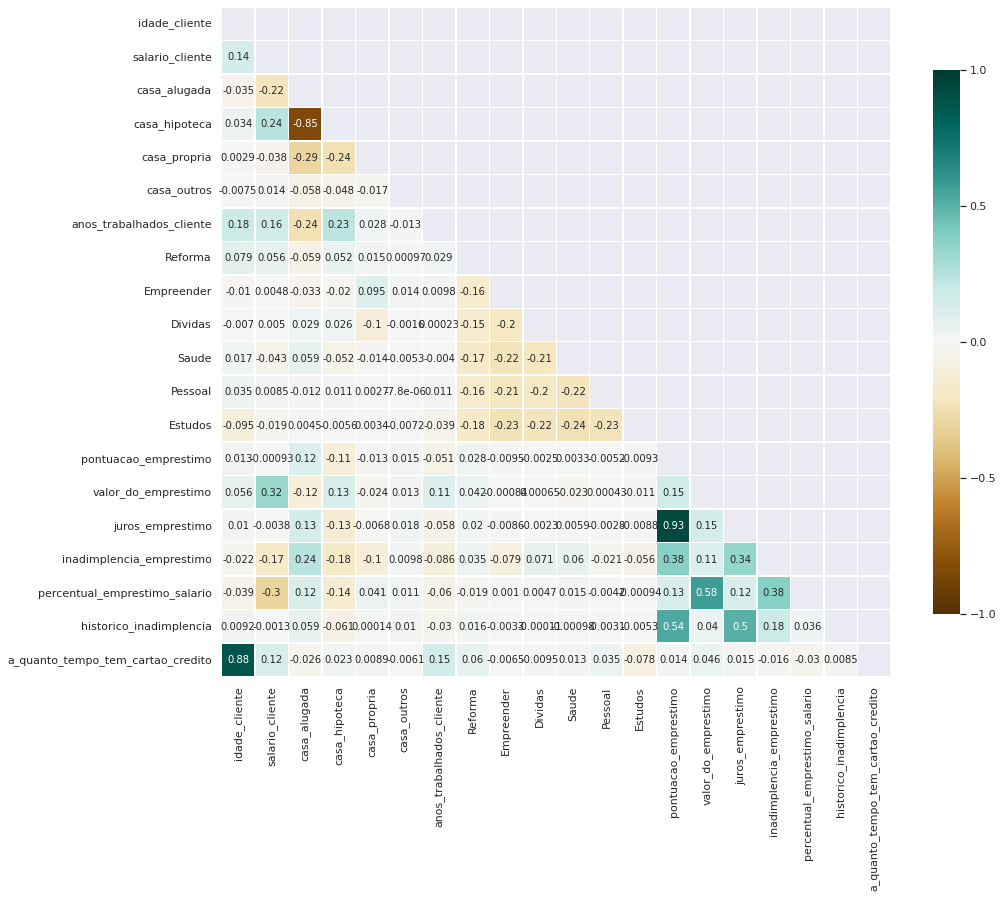

In [75]:
f, ax = plt.subplots(figsize=(15, 25))
mask = np.zeros_like(corr_matriz, dtype=np.bool) 
mask[np.triu_indices_from(mask)]= True

heatmap = sns.heatmap(corr_matriz, 
                      mask = mask, 
                      square = True, 
                      linewidths = .5, 
                      cmap = 'BrBG', 
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0 , 0.5, 1]}, 
                      vmin = -1, 
                      vmax = 1, 
                      annot = True, 
                      annot_kws = {"size": 10})
#adicione os nomes das colunas como rótulos 
ax.set_yticklabels(corr_matriz.columns, rotation = 0) 
ax.set_xticklabels(corr_matriz.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

O gráfico de correlação deixou claro que há uma relação entre a `pontuação` com os `juros` dos empréstimos, que junto com a variável `casa alugada` e valor emprestimo, possuem uma relação mais significativa com ‘inadimplencia’.

## Normalização de dados:

In [76]:
from sklearn.preprocessing import MinMaxScaler

In [77]:
normalizacao = MinMaxScaler()

normalizacao.fit(alura_cash_tratado)
alura_cash_normalizado = normalizacao.transform(alura_cash_tratado)
alura_cash_normalizado

array([[0.109375  , 0.03143752, 1.        , ..., 0.15662651, 0.        ,
        0.10714286],
       [0.0625    , 0.00422442, 1.        , ..., 0.24096386, 1.        ,
        0.        ],
       [0.15625   , 0.04715628, 1.        , ..., 0.14457831, 0.        ,
        0.25      ],
       ...,
       [0.296875  , 0.02554298, 0.        , ..., 0.21686747, 1.        ,
        0.35714286],
       [0.125     , 0.01228028, 1.        , ..., 0.3373494 , 1.        ,
        0.25      ],
       [0.046875  , 0.02259572, 1.        , ..., 0.28915663, 0.        ,
        0.03571429]])

In [78]:
alura_cash_normalizado = pd.DataFrame(alura_cash_normalizado, columns = alura_cash_tratado.columns)
alura_cash_normalizado

,idade_cliente,salario_cliente,casa_alugada,casa_hipoteca,casa_propria,casa_outros,anos_trabalhados_cliente,Reforma,Empreender,Dividas,Saude,Pessoal,Estudos,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,inadimplencia_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
0,0.109375,0.031438,1.0,0.0,0.0,0.0,0.097561,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.237681,0.138202,0.0,0.156627,0.0,0.107143
1,0.062500,0.004224,1.0,0.0,0.0,0.0,0.048780,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.057971,0.432022,1.0,0.240964,1.0,0.000000
2,0.156250,0.047156,1.0,0.0,0.0,0.0,0.317073,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.333333,0.138202,0.0,0.144578,0.0,0.250000
3,0.156250,0.052265,1.0,0.0,0.0,0.0,0.024390,0.0,1.0,0.0,0.0,0.0,0.0,0.500000,0.391304,0.644382,1.0,0.156627,0.0,0.142857
4,0.062500,0.055996,0.0,1.0,0.0,0.0,0.146341,0.0,1.0,0.0,0.0,0.0,0.0,0.666667,0.507246,0.652809,0.0,0.180723,1.0,0.035714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28627,0.453125,0.029767,0.0,1.0,0.0,0.0,0.097561,0.0,0.0,0.0,1.0,0.0,0.0,0.500000,0.275362,0.621910,1.0,0.156627,0.0,0.357143
28628,0.046875,0.037578,1.0,0.0,0.0,0.0,0.121951,0.0,1.0,0.0,0.0,0.0,0.0,0.166667,0.194203,0.215169,0.0,0.108434,0.0,0.035714
28629,0.296875,0.025543,0.0,1.0,0.0,0.0,0.341463,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,0.275362,0.410674,0.0,0.216867,1.0,0.357143
28630,0.125000,0.012280,1.0,0.0,0.0,0.0,0.024390,0.0,0.0,0.0,1.0,0.0,0.0,0.333333,0.217391,0.432022,1.0,0.337349,1.0,0.250000


## Balanceamento Oversampling:

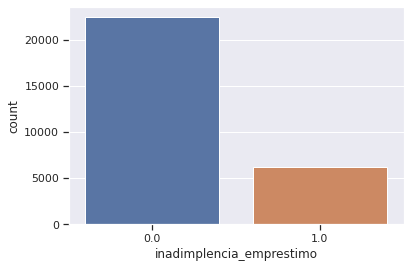

In [79]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='inadimplencia_emprestimo', data = alura_cash_normalizado)

Diante o gráfico de inadimplência e pagamentos corretos, observa-se que há mais casos de pagamentos corretos do que inadimplência no dataframe. Isso pode trazer um problema de desbalanceamento, em que o modelo estará mais propenso a atribuir respostas como '0' do que como '1'.

In [80]:
X = alura_cash_normalizado.drop('inadimplencia_emprestimo', axis = 1)
y = alura_cash_normalizado['inadimplencia_emprestimo']

In [81]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)
x_over, y_over = smt.fit_resample(X, y)

In [82]:
alura_cash_normalizado = pd.concat([x_over, y_over], axis=1)
alura_cash_normalizado.head(2)

,idade_cliente,salario_cliente,casa_alugada,casa_hipoteca,casa_propria,casa_outros,anos_trabalhados_cliente,Reforma,Empreender,Dividas,Saude,Pessoal,Estudos,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito,inadimplencia_emprestimo
0,0.109375,0.031438,1.0,0.0,0.0,0.0,0.097561,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.237681,0.138202,0.156627,0.0,0.107143,0.0
1,0.062500,0.004224,1.0,0.0,0.0,0.0,0.048780,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.057971,0.432022,0.240964,1.0,0.000000,1.0


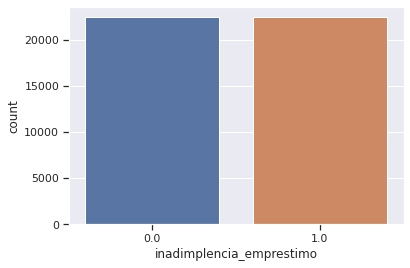

In [83]:
ax = sns.countplot(x = 'inadimplencia_emprestimo', data = alura_cash_normalizado)  # plotando novamente o gráfico

In [84]:
alura_cash_normalizado.shape

(44860, 20)

E agora, a base de dados contém mais de 44 mil registros.

In [85]:
# Quando fui fazer a conferência entre o que eu havia feito e o ‘gabarito’ que foi fornecido pelos instrutores, 
# vi que eles dividiram entre modelos com Oversampling e Undersampling

## Criação dos modelos - Oversampling:

In [86]:
# Biblioteca para divisão dos dados
from sklearn.model_selection import train_test_split

In [87]:
x_treino_over, x_teste_over, y_treino_over, y_teste_over = train_test_split(x_over, y_over,
                                                                            test_size=0.3, random_state=123)

In [88]:
# Para ver a classificação do modelo:
from numpy import random
def classificar(modelo):
    print("Resultado da classificação %.2f%%" % (modelo.score(x_teste_over, y_teste_over)* 100))

Diante minha pouca experiência na área, eu escolhi replicar modelos que aprendi em alguns cursos, o KNN, SVC, Bernoulli, Árvore de decisão e Random Forest. Pois eu havia entendido que deveria usar apenas modelos de classificação, enquanto no ‘gabarito’ foi testado um modelo de regressão logística e Gradient Boosting. Ainda não tinha visto nenhum dos dois, mas estudarei ambos, com mais calma, ao final do Challenge.

### Treino / Teste com KNN:

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn = KNeighborsClassifier(metric = 'euclidean')

In [91]:
knn.fit(x_treino_over, y_treino_over)

KNeighborsClassifier(metric='euclidean')

In [92]:
predito_knn = knn.predict(x_teste_over)
predito_knn

array([0., 1., 1., ..., 0., 1., 1.])

In [93]:
from sklearn.metrics import accuracy_score

print("Resultado da acurácia: %.2f%%" % (accuracy_score(y_teste_over, predito_knn)*100))

Resultado da acurácia: 87.59%


In [94]:
knn_braycurtis = KNeighborsClassifier(metric = 'braycurtis')
knn_braycurtis.fit(x_treino_over, y_treino_over)
predito_knn_braycurtis = knn_braycurtis.predict(x_teste_over)
predito_knn_braycurtis

array([0., 1., 1., ..., 0., 1., 1.])

In [95]:
def acuracia_do_modelo(modelo):
  print("Resultado da acurácia: %.2f%%" % (accuracy_score(y_teste_over, modelo)*100))

In [96]:
acuracia_do_modelo(predito_knn_braycurtis)

Resultado da acurácia: 88.57%


In [97]:
knn_canberra = KNeighborsClassifier(metric = 'canberra')
knn_canberra.fit(x_treino_over, y_treino_over)
predito_knn_canberra = knn_canberra.predict(x_teste_over)
predito_knn_canberra

array([0., 1., 1., ..., 0., 1., 1.])

In [98]:
acuracia_do_modelo(predito_knn_canberra)

Resultado da acurácia: 87.96%


In [99]:
knn_chebyshev = KNeighborsClassifier(metric = 'chebyshev')
knn_chebyshev.fit(x_treino_over, y_treino_over)
predito_knn_chebyshev = knn_chebyshev.predict(x_teste_over)
predito_knn_chebyshev

array([0., 1., 1., ..., 0., 1., 1.])

In [100]:
acuracia_do_modelo(predito_knn_chebyshev)

Resultado da acurácia: 87.10%


### Treino / Teste com Linear SVC:

In [101]:
from sklearn.svm import LinearSVC

modelo = LinearSVC(random_state=123)
modelo.fit(x_treino_over, y_treino_over)

predito_linearSVC = modelo.predict(x_teste_over)
predito_linearSVC

array([0., 1., 1., ..., 0., 1., 1.])

In [102]:
acuracia_do_modelo(predito_linearSVC)

Resultado da acurácia: 79.37%


In [103]:
from sklearn.svm import SVC

modelo_svc = SVC(random_state=123)
modelo_svc.fit(x_treino_over, y_treino_over)
predito_svc = modelo_svc.predict(x_teste_over)
predito_svc

array([0., 1., 1., ..., 0., 1., 1.])

In [104]:
acuracia_do_modelo(predito_svc)

Resultado da acurácia: 83.19%


### Treino / Teste com Bernoulli Naive Bayes:

In [105]:
from sklearn.naive_bayes import BernoulliNB

In [106]:
np.median(x_treino_over)

0.012771492456960071

In [107]:
bnb = BernoulliNB(binarize = 0.0127)

In [108]:
bnb.fit(x_treino_over, y_treino_over)

BernoulliNB(binarize=0.0127)

In [109]:
predito_bnb = bnb.predict(x_teste_over)
predito_bnb

array([0., 1., 1., ..., 0., 1., 1.])

In [110]:
acuracia_do_modelo(predito_bnb)

Resultado da acurácia: 69.34%


### Treino / Teste com Árvore de decisão:

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)

In [113]:
dtc.fit(x_treino_over, y_treino_over)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [114]:
predito_arvoreDecisao = dtc.predict(x_teste_over)
predito_arvoreDecisao

array([0., 1., 1., ..., 0., 1., 1.])

In [115]:
acuracia_do_modelo(predito_arvoreDecisao)

Resultado da acurácia: 90.34%


In [116]:
dtc_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
dtc_gini.fit(x_treino_over, y_treino_over)
predito_arvoreDecisao_gini = dtc_gini.predict(x_teste_over)
predito_arvoreDecisao_gini

array([0., 1., 1., ..., 0., 1., 1.])

In [117]:
acuracia_do_modelo(predito_arvoreDecisao_gini)

Resultado da acurácia: 90.04%


### Treino / Teste com Random Forest:

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

random_forest = RandomForestClassifier(criterion='gini', random_state=123)
random_forest.fit(x_treino_over, y_treino_over)

predito_rf = random_forest.predict(x_teste_over)
predito_rf

array([0., 1., 1., ..., 0., 1., 1.])

In [119]:
acuracia_do_modelo(predito_rf)

Resultado da acurácia: 94.20%


In [120]:
random_forest_e = RandomForestClassifier(criterion='entropy', random_state=123)
random_forest_e.fit(x_treino_over, y_treino_over)

predito_rf_e = random_forest_e.predict(x_teste_over)
predito_rf_e

array([0., 1., 1., ..., 0., 1., 1.])

In [121]:
acuracia_do_modelo(predito_rf_e)

Resultado da acurácia: 94.26%


## Validação dos modelos - Oversampling:

In [122]:
from sklearn.metrics import confusion_matrix

In [123]:
print(confusion_matrix(y_teste_over, predito_knn))

[[5563 1140]
 [ 530 6225]]


In [124]:
print(confusion_matrix(y_teste_over, predito_knn_braycurtis))

[[5701 1002]
 [ 536 6219]]


In [125]:
print(confusion_matrix(y_teste_over, predito_knn_canberra))

[[5741  962]
 [ 659 6096]]


In [126]:
print(confusion_matrix(y_teste_over, predito_knn_chebyshev))

[[5522 1181]
 [ 555 6200]]




---



---



In [127]:
print(confusion_matrix(y_teste_over, predito_linearSVC))

[[5380 1323]
 [1453 5302]]


In [128]:
print(confusion_matrix(y_teste_over, predito_svc))

[[6040  663]
 [1599 5156]]




---



---



In [129]:
print(confusion_matrix(y_teste_over, predito_bnb))

[[4417 2286]
 [1840 4915]]




---



---



In [130]:
print(confusion_matrix(y_teste_over, predito_arvoreDecisao))

[[6026  677]
 [ 623 6132]]


In [131]:
print(confusion_matrix(y_teste_over, predito_arvoreDecisao_gini))

[[6018  685]
 [ 656 6099]]




---



In [132]:
print(confusion_matrix(y_teste_over, predito_rf))

[[6582  121]
 [ 660 6095]]


In [133]:
print(confusion_matrix(y_teste_over, predito_rf_e))

[[6590  113]
 [ 659 6096]]


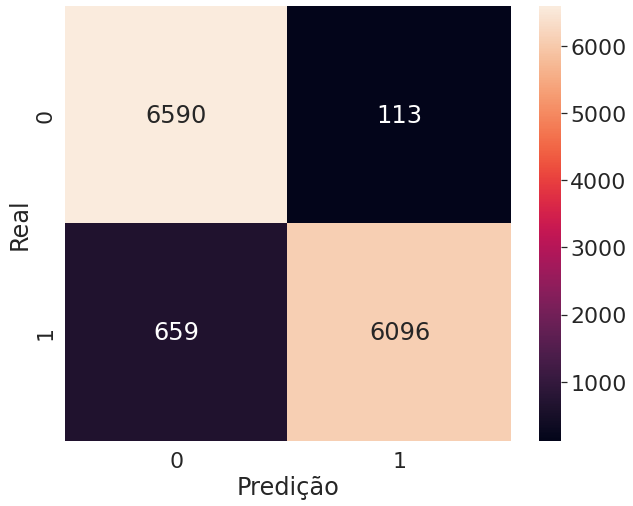

In [134]:
matriz_confusao = confusion_matrix(y_teste_over, predito_rf_e)

plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot =True, fmt = "d").set(xlabel = "Predição", ylabel = "Real");



---



---



Comparando com um DummyClassifier:

In [135]:
from numpy import random
from sklearn.dummy import DummyClassifier

SEED = 123
random.seed(SEED)

classificador_dummy = DummyClassifier(strategy = "most_frequent")
classificador_dummy.fit(x_treino_over, y_treino_over)
print("Resultado da Dummy Classifier %.2f%%" % (classificador_dummy.score(x_teste_over, y_teste_over)* 100))

Resultado da Dummy Classifier 49.81%




---



---



In [136]:
from sklearn.metrics import classification_report

In [137]:
print(classification_report(y_teste_over, predito_rf))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      6703
         1.0       0.98      0.90      0.94      6755

    accuracy                           0.94     13458
   macro avg       0.94      0.94      0.94     13458
weighted avg       0.94      0.94      0.94     13458



In [138]:
print(classification_report(y_teste_over, predito_rf_e))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      6703
         1.0       0.98      0.90      0.94      6755

    accuracy                           0.94     13458
   macro avg       0.95      0.94      0.94     13458
weighted avg       0.95      0.94      0.94     13458



## Balanceamento Undersampling:

In [139]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler(random_state = 123, sampling_strategy = 0.5)
x_treino_under, y_treino_under = under.fit_resample(X, y)
x_treino_under

,idade_cliente,salario_cliente,casa_alugada,casa_hipoteca,casa_propria,casa_outros,anos_trabalhados_cliente,Reforma,Empreender,Dividas,Saude,Pessoal,Estudos,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito
0,0.093750,0.007859,0.0,1.0,0.0,0.0,0.024390,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.028986,0.130337,0.084337,0.0,0.035714
1,0.046875,0.012771,0.0,1.0,0.0,0.0,0.048780,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.333333,0.619663,0.481928,1.0,0.035714
2,0.046875,0.028490,0.0,1.0,0.0,0.0,0.048780,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.130435,0.457865,0.096386,1.0,0.035714
3,0.140625,0.013754,0.0,1.0,0.0,0.0,0.317073,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.217391,0.032022,0.301205,0.0,0.142857
4,0.062500,0.025052,1.0,0.0,0.0,0.0,0.121951,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.275362,0.000000,0.216867,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18601,0.015625,0.016308,0.0,1.0,0.0,0.0,0.073171,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.472464,0.042135,0.542169,0.0,0.000000
18602,0.031250,0.009824,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.028986,0.751124,0.072289,1.0,0.035714
18603,0.250000,0.022105,1.0,0.0,0.0,0.0,0.146341,1.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.188406,0.298876,0.168675,0.0,0.500000
18604,0.453125,0.029767,0.0,1.0,0.0,0.0,0.097561,0.0,0.0,0.0,1.0,0.0,0.0,0.500000,0.275362,0.621910,0.156627,0.0,0.357143


In [140]:
alura_cash_under = pd.concat([x_treino_under, y_treino_under], axis=1)
alura_cash_under

,idade_cliente,salario_cliente,casa_alugada,casa_hipoteca,casa_propria,casa_outros,anos_trabalhados_cliente,Reforma,Empreender,Dividas,Saude,Pessoal,Estudos,pontuacao_emprestimo,valor_do_emprestimo,juros_emprestimo,percentual_emprestimo_salario,historico_inadimplencia,a_quanto_tempo_tem_cartao_credito,inadimplencia_emprestimo
0,0.093750,0.007859,0.0,1.0,0.0,0.0,0.024390,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.028986,0.130337,0.084337,0.0,0.035714,0.0
1,0.046875,0.012771,0.0,1.0,0.0,0.0,0.048780,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.333333,0.619663,0.481928,1.0,0.035714,0.0
2,0.046875,0.028490,0.0,1.0,0.0,0.0,0.048780,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.130435,0.457865,0.096386,1.0,0.035714,0.0
3,0.140625,0.013754,0.0,1.0,0.0,0.0,0.317073,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.217391,0.032022,0.301205,0.0,0.142857,0.0
4,0.062500,0.025052,1.0,0.0,0.0,0.0,0.121951,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.275362,0.000000,0.216867,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18601,0.015625,0.016308,0.0,1.0,0.0,0.0,0.073171,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.472464,0.042135,0.542169,0.0,0.000000,1.0
18602,0.031250,0.009824,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.028986,0.751124,0.072289,1.0,0.035714,1.0
18603,0.250000,0.022105,1.0,0.0,0.0,0.0,0.146341,1.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.188406,0.298876,0.168675,0.0,0.500000,1.0
18604,0.453125,0.029767,0.0,1.0,0.0,0.0,0.097561,0.0,0.0,0.0,1.0,0.0,0.0,0.500000,0.275362,0.621910,0.156627,0.0,0.357143,1.0


In [141]:
x_treino_under, x_teste_under, y_treino_under, y_teste_under = train_test_split(x_treino_under, 
                                                                                y_treino_under,
                                                                                test_size=0.3, 
                                                                                random_state=123)

In [142]:
def acuracia_do_modelo(modelo):
  print("Resultado da acurácia: %.2f%%" % (accuracy_score(y_teste_under, modelo)*100))

## Criação dos modelos - Undersampling:

### Treino / Teste com KNN:

In [143]:
knn_under = KNeighborsClassifier(metric = 'euclidean')
knn_under.fit(x_treino_under, y_treino_under)
predito_knn_under = knn_under.predict(x_teste_under)
acuracia_do_modelo(predito_knn_under)

Resultado da acurácia: 84.43%


In [144]:
knn_braycurtis_under = KNeighborsClassifier(metric = 'braycurtis')
knn_braycurtis_under.fit(x_treino_under, y_treino_under)
predito_knn_braycurtis_under = knn_braycurtis_under.predict(x_teste_under)
acuracia_do_modelo(predito_knn_braycurtis_under)

Resultado da acurácia: 84.16%


In [145]:
knn_canberra_under = KNeighborsClassifier(metric = 'canberra')
knn_canberra_under.fit(x_treino_under, y_treino_under)
predito_knn_canberra_under = knn_canberra_under.predict(x_teste_under)
acuracia_do_modelo(predito_knn_canberra_under)

Resultado da acurácia: 81.44%


In [146]:
knn_chebyshev_under = KNeighborsClassifier(metric = 'chebyshev')
knn_chebyshev_under.fit(x_treino_under, y_treino_under)
predito_knn_chebyshev_under = knn_chebyshev_under.predict(x_teste_under)
acuracia_do_modelo(predito_knn_chebyshev_under)

Resultado da acurácia: 83.91%


### Treino / Teste com SVC:

In [147]:
modelo_under = LinearSVC(random_state=123)
modelo_under.fit(x_treino_under, y_treino_under)
predito_linearSVC_under = modelo_under.predict(x_teste_under)

acuracia_do_modelo(predito_linearSVC_under)

Resultado da acurácia: 80.97%


In [148]:
modelo_svc_under = SVC(random_state=123)
modelo_svc_under.fit(x_treino_under, y_treino_under)
predito_svc_under = modelo_svc_under.predict(x_teste_under)

acuracia_do_modelo(predito_svc_under)

Resultado da acurácia: 86.12%


### Teste / Treino com Bernoulli Naive Bayes:

In [149]:
np.median(x_treino_under)

0.009824224966892363

In [150]:
bnb_under = BernoulliNB(binarize = 0.00982)
bnb_under.fit(x_treino_under, y_treino_under)
predito_bnb_under = bnb_under.predict(x_teste_under)

acuracia_do_modelo(predito_bnb_under)

Resultado da acurácia: 70.14%


### Treino / Teste com Árvore de decisão:

In [151]:
dtc_under = DecisionTreeClassifier(criterion = 'entropy', random_state = 123)
dtc_under.fit(x_treino_under, y_treino_under)
predito_arvoreDecisao_under = dtc_under.predict(x_teste_under)

acuracia_do_modelo(predito_arvoreDecisao_under)

Resultado da acurácia: 84.61%


In [152]:
dtc_gini_under = DecisionTreeClassifier(criterion = 'gini', random_state = 123)
dtc_gini_under.fit(x_treino_under, y_treino_under)
predito_arvoreDecisao_gini_under = dtc_gini_under.predict(x_teste_under)
acuracia_do_modelo(predito_arvoreDecisao_gini_under)

Resultado da acurácia: 83.12%


### Teste / Treino com Random Forest:

In [153]:
random_forest_under = RandomForestClassifier(criterion='gini', random_state=123)
random_forest_under.fit(x_treino_under, y_treino_under)
predito_rf_under = random_forest_under.predict(x_teste_under)

acuracia_do_modelo(predito_rf_under)

Resultado da acurácia: 89.65%


In [154]:
random_forest_e_under = RandomForestClassifier(criterion='entropy', random_state=123)
random_forest_e_under.fit(x_treino_under, y_treino_under)
predito_rf_e_under = random_forest_e_under.predict(x_teste_under)

acuracia_do_modelo(predito_rf_e_under)

Resultado da acurácia: 89.50%


## Validação - Undersampling:

### Matriz de confusão:

In [155]:
def matriz_confusao_under(modelo):
  print(confusion_matrix(y_teste_under, modelo))

In [156]:
# KNN
matriz_confusao_under(predito_knn_under)

[[3485  265]
 [ 604 1228]]


In [157]:
matriz_confusao_under(predito_knn_braycurtis_under)

[[3471  279]
 [ 605 1227]]


In [158]:
matriz_confusao_under(predito_knn_canberra_under)

[[3402  348]
 [ 688 1144]]


In [159]:
matriz_confusao_under(predito_knn_chebyshev_under)

[[3468  282]
 [ 616 1216]]


In [160]:
# SVC
matriz_confusao_under(predito_linearSVC_under)

[[3345  405]
 [ 657 1175]]


In [161]:
matriz_confusao_under(predito_svc_under)

[[3562  188]
 [ 587 1245]]


In [162]:
# Bernoulli
matriz_confusao_under(predito_bnb_under)

[[2945  805]
 [ 862  970]]


In [163]:
# Árvore de descisão
matriz_confusao_under(predito_arvoreDecisao_under)

[[3272  478]
 [ 381 1451]]


In [164]:
matriz_confusao_under(predito_arvoreDecisao_gini_under)

[[3227  523]
 [ 419 1413]]


In [165]:
# Random Forest
matriz_confusao_under(predito_rf_under)

[[3670   80]
 [ 498 1334]]


In [166]:
matriz_confusao_under(predito_rf_e_under)

[[3671   79]
 [ 507 1325]]


### Classificação dos modelos:

In [167]:
def classificacao_modelo(modelo):
  print(classification_report(y_teste_under, modelo))

#### Random forest:

In [168]:
classificacao_modelo(predito_rf_under)

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      3750
         1.0       0.94      0.73      0.82      1832

    accuracy                           0.90      5582
   macro avg       0.91      0.85      0.87      5582
weighted avg       0.90      0.90      0.89      5582



In [169]:
classificacao_modelo(predito_rf_e_under)

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      3750
         1.0       0.94      0.72      0.82      1832

    accuracy                           0.90      5582
   macro avg       0.91      0.85      0.87      5582
weighted avg       0.90      0.90      0.89      5582



## Escolhendo o modelo:

In [170]:
# Random Forest entropy - Oversampling

print(classification_report(y_teste_over, predito_rf_e))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94      6703
         1.0       0.98      0.90      0.94      6755

    accuracy                           0.94     13458
   macro avg       0.95      0.94      0.94     13458
weighted avg       0.95      0.94      0.94     13458



In [171]:
# Random Forest gini - Undersampling

classificacao_modelo(predito_rf_under)

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      3750
         1.0       0.94      0.73      0.82      1832

    accuracy                           0.90      5582
   macro avg       0.91      0.85      0.87      5582
weighted avg       0.90      0.90      0.89      5582



Analisando o resultado destes dois modelos, decidi seguir com o modelo Oversampling, porque ele apresentou melhores classificações na precisão, recall e acurácia.

Havia uma atividade relacionada a hiperparâmetros, mas considerando que eu já estava mais de uma semana ‘atrasada’ (pelo menos em relação com as demandas do Challenge), eu anotei a atividade e pretendo retornar a ela quando eu finalizar o curso que aborda o tema.

## Exportando o modelo:

In [172]:
import pickle

In [173]:
with open('encoding_casa.pkl', 'wb') as file:
    pickle.dump(one_hot_casa, file)

In [174]:
with open('encoding_motivo.pkl', 'wb') as file:
    pickle.dump(one_hot_motivo, file)

In [175]:
with open('normalizacao.pkl', 'wb') as file:
    pickle.dump(normalizacao, file)

In [176]:
with open('random_forest_over.pkl', 'wb') as file:
    pickle.dump(predito_rf_e, file)